![Iris](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png)

### Load Data

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Visualize Data

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Lets create a 3D Graph

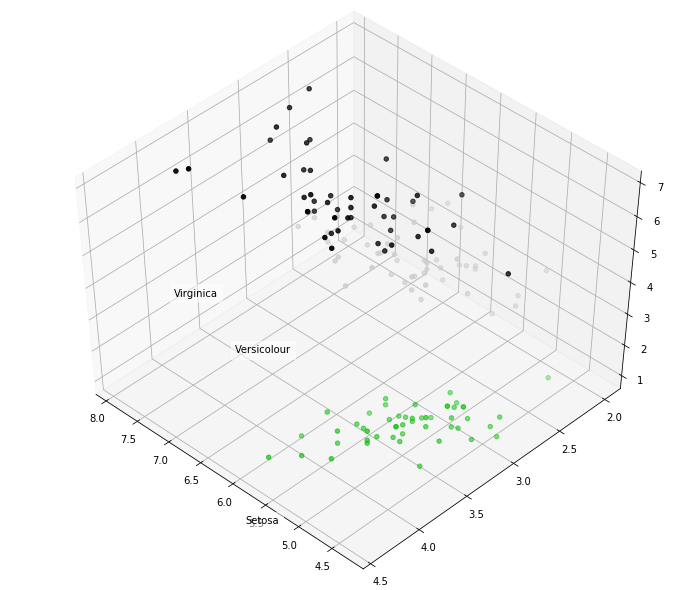

In [8]:
fig = plt.figure(1, figsize=(10, 8))

plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=cm.get_cmap("nipy_spectral"))

plt.show()

In [13]:
# From the plot, we infer that the data is not linearly separable.

### Building a Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split Train and Test Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

Build a Decision Tree

In [11]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Check Accuracy

In [12]:
model.score(X_test, y_test)

0.8888888888888888

### Using PCA

In [14]:
from sklearn.decomposition import PCA

Centering the Data

In [19]:
X.mean(axis=0) # column means

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [20]:
X_centered = X - X.mean(axis=0)

PCA with 2 components

In [21]:
pca = PCA(n_components=2)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Get new dimensions - Moving data to the Principal Components - PC1 & PC2

In [22]:
X_pca = pca.transform(X_centered)

In [23]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [24]:
X_pca.shape

(150, 2)

Plotting Iris data using 2 PCs

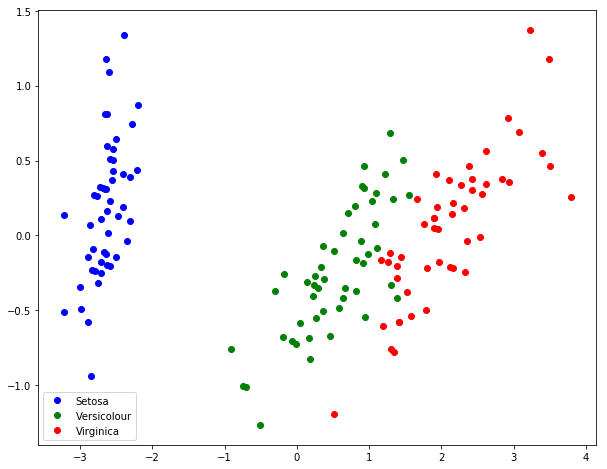

In [25]:
fig = plt.figure(1, figsize=(10, 8))

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

plt.show()

### Exploring PCA 

Check EigenVectors or PC 1/2

In [26]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [29]:
# Feature 3 is dominant in PC1 (0.85667061). Petal feature is playing a key role. In PC2, Feature 1 is dominant, Sepal feature
# is playing a key role here. So, the features are getting separated correctly.

In [30]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [31]:
# These are the eigen values for PC1 and PC2.

In [32]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [34]:
# PC1 and PC2 together capture aprroximately 97% of the variance. Since, we had 4 features in the dataset, the maximum number
# of princiapl components we could have had is 4. So, we are only losing out only 3% of the variance in the data using only 2
# principal components. We have not lost much information coming from 4 dimensions to 2 dimensions.

### Building Classifier using PCA features

In [35]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(pca.transform(X_train), y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [36]:
model.score(pca.transform(X_test), y_test)

0.9111111111111111